In [1]:
library('readr')
library('stringr')
library('magrittr')
library('tidyr')
library('dplyr')
library('ggplot2')


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
mouse_names <- c(
    "MKS087-A-1",
    "MKS087-A-2",
    "MKS087-A-3",
    "MKS087-A-4",
    "MKS087-A-5",
    "MKS087-B-1",
    "MKS087-C-1",
    "MKS087-C-2",
    "MKS087-C-3",
    "MKS087-C-4",
    "MKS087-C-5",
    "MKS087-D-1",
    "MKS087-D-2",
    "MKS087-D-3",
    "MKS087-D-4",
    "MKS087-D-5",
    "MKS088-A-2",
    "MKS088-A-3",
    "MKS088-A-4",
    "MKS088-B-1",
    "MKS088-B-2",
    "MKS088-B-3",
    "MKS088-B-4",
    "MKS088-B-5",
    "MKS088-C-1",
    "MKS088-C-2",
    "MKS088-C-3",
    "MKS088-C-4",
    "MKS088-C-5"
)

In [8]:
tumor_size <-
    read_tsv(
        '../data//2019-05-tumor-growth.tsv',
        col_types=cols(
            `Mouse`=col_factor(levels=mouse_names),
            `Cell line`=col_factor(levels=c('MC38-B', 'LLC-A9F1')),
            `Trial`=col_factor(levels=c('Trial 1', 'Trial 2')),
            `Day`=col_number(),
            .default=col_double()
        )
    )

tumor_size %>% head

Mouse,Cell line,Trial,Day,Length,Width,Area
MKS088-A-2,MC38-B,Trial 1,0,0.00,0.00,0.00
MKS088-A-2,MC38-B,Trial 1,4,0.00,0.00,0.00
MKS088-A-2,MC38-B,Trial 1,5,0.00,0.00,0.00
MKS088-A-2,MC38-B,Trial 1,8,4.30,3.46,14.88
MKS088-A-2,MC38-B,Trial 1,11,4.72,3.77,17.79
MKS088-A-2,MC38-B,Trial 1,13,3.60,3.60,12.96


Warning message:
“Removed 16 rows containing missing values (geom_path).”

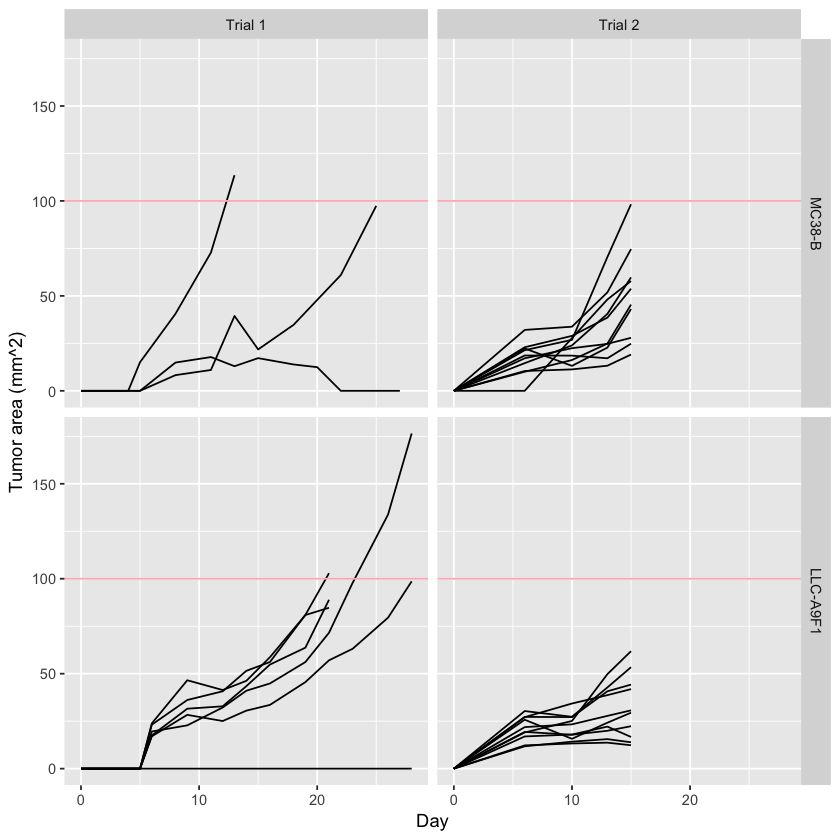

In [15]:
tumor_size %>%
    ggplot(aes(x=`Day`, y=`Area`, group=`Mouse`)) +
        geom_line() +
        geom_hline(yintercept=100, color="lightpink") +
        facet_grid(`Cell line`~`Trial`) +
        ylab('Tumor area (mm^2)')
